In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('data.csv')

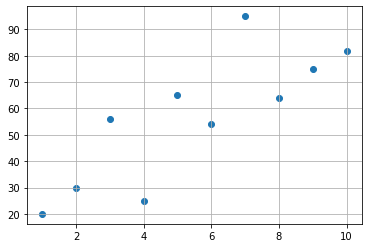

In [12]:
plt.scatter(df.studytime, df.score)
plt.grid()

$$
E = \frac{1}{n}\sum_{i=0}^{n}(y_i - (wx_i+b))^2
$$

In [16]:
def mse(w, b, df):
    """
    df: сэмплы выборки (=точки на графике)
    """
    
    total_error = 0
    n = len(df)
    for i in range(n):
        x = df.iloc[i].studytime
        y = df.iloc[i].score
        total_error += (y - (w*x + b))**2
    error = total_error / float(n)
    return error

$$
\frac{\partial E}{\partial w} = -\frac{2}{n}\sum_{i=0}^{n}x_i(y_i - (wx_i+b))    
$$

$$
\frac{\partial E}{\partial b} = -\frac{2}{n}\sum_{i=0}^{n}(y_i - (wx_i+b))    
$$

$$
w = w - \eta\frac{\partial E}{\partial w}
$$

$$
b = b - \eta\frac{\partial E}{\partial b}
$$

Coefficient :  9.241152874557253
Intercept :  2.0909180321957037
Mean Squared Error :  254.12736100437797


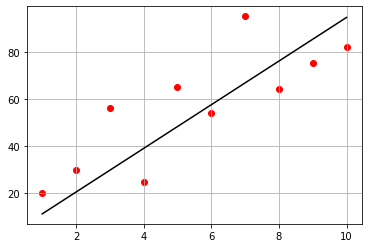

In [20]:
def gradient_descent(w_curr, b_curr, df, lr=0.001):
    
    w_gradient = 0
    b_gradient = 0
    n = len(df)

    for i in range(n):
        x_i = df.iloc[i].studytime
        y_i = df.iloc[i].score

        w_gradient += (-2/n) * x_i * (y_i - w_curr*x_i - b_curr)
        b_gradient += (-2/n) * (y_i - w_curr*x_i - b_curr)

    w = w_curr - w_gradient*lr
    b = b_curr - b_gradient*lr
    return w, b


w = 0
b = 0
lr = 0.00001
epochs = 10000

for i in range(epochs):
    w, b = gradient_descent(w, b, df, lr)
print("Coefficient : ", w)
print("Intercept : ", b)
print("Mean Squared Error : ", mse(w, b, df))

plt.scatter(df.studytime, df.score, color='red')
plt.plot(df.studytime, w*df.studytime+b, color= 'black')
plt.grid()
plt.show()